In [1]:
from statsmodels.tools.sm_exceptions import ValueWarning

import VARmodel
import loadDataForSKtime
import ARIMAmodel
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ValueWarning)

In [2]:
loader = loadDataForSKtime.PatientTimeSeriesLoader(
    "C:/Users/emily/Documents/DissertationProject/training/training_setA_csv", ['HR'])
sktime_df = loader.load_data()
train_data, test_data = loader.split_train_test(sktime_df)

train_data.head()

train_data_sub, test_data_sub = loader.subset_data(train_data, test_data, max_patient_id=100)
## pickle the data

MultiIndex([( 0,  1),
            ( 0,  2),
            ( 0,  3),
            ( 0,  4),
            ( 0,  5),
            ( 0,  6),
            ( 0,  7),
            ( 0,  8),
            ( 0,  9),
            ( 0, 10),
            ...
            (99, 24),
            (99, 25),
            (99, 26),
            (99, 27),
            (99, 28),
            (99, 29),
            (99, 30),
            (99, 31),
            (99, 32),
            (99, 33)],
           names=['Patient_ID', 'ICULOS'], length=3104)
MultiIndex([( 0, 49),
            ( 0, 50),
            ( 0, 51),
            ( 0, 52),
            ( 0, 53),
            ( 0, 54),
            ( 1, 18),
            ( 1, 19),
            ( 1, 20),
            ( 1, 21),
            ...
            (98, 22),
            (98, 23),
            (98, 24),
            (98, 25),
            (99, 34),
            (99, 35),
            (99, 36),
            (99, 37),
            (99, 38),
            (99, 39)],
           names=['Patient_ID'

In [12]:
train_data_sub.head()

HR  O2Sat  Temp    SBP    MAP  DBP  Resp  EtCO2  \
Patient_ID ICULOS                                                       
0          1        -1.0   -1.0  -1.0   -1.0  -1.00 -1.0  -1.0   -1.0   
           2        97.0   95.0  -1.0   98.0  75.33 -1.0  19.0   -1.0   
           3        89.0   99.0  -1.0  122.0  86.00 -1.0  22.0   -1.0   
           4        90.0   95.0  -1.0   -1.0  -1.00 -1.0  30.0   -1.0   
           5       103.0   88.5  -1.0  122.0  91.33 -1.0  24.5   -1.0   

                   BaseExcess  HCO3  ...  PTT  WBC  Fibrinogen  Platelets  \
Patient_ID ICULOS                    ...                                    
0          1             -1.0  -1.0  ... -1.0 -1.0        -1.0       -1.0   
           2             -1.0  -1.0  ... -1.0 -1.0        -1.0       -1.0   
           3             -1.0  -1.0  ... -1.0 -1.0        -1.0       -1.0   
           4             24.0  -1.0  ... -1.0 -1.0        -1.0       -1.0   
           5             -1.0  -1.0  ... -1.0 -1.0        -1.0       -1.0   

                     Age  Gender  Unit1  Unit2  HospAdmTime  SepsisLabel  
Patient_ID ICULOS                                                         
0          1       83.14       0   -1.0   -1.0        -0.03            0  
           2       83.14       0   -1.0   -1.0        -0.03            0  
           3       83.14       0   -1.0   -1.0        -0.03            0  
           4       83.14       0   -1.0   -1.0        -0.03            0  
           5       83.14       0   -1.0   -1.0        -0.03            0  

[5 rows x 40 columns]

Poster - visualise pipeline

In [3]:
print(train_data_sub.isna().sum())
print(test_data_sub.isna().sum())

HR    0
dtype: int64
HR    0
dtype: int64


In [8]:
print(train_data_sub.head())

                      HR  O2Sat  Temp    SBP    MAP  DBP  Resp  EtCO2  \
Patient_ID ICULOS                                                       
0          1        -1.0   -1.0  -1.0   -1.0  -1.00 -1.0  -1.0   -1.0   
           2        97.0   95.0  -1.0   98.0  75.33 -1.0  19.0   -1.0   
           3        89.0   99.0  -1.0  122.0  86.00 -1.0  22.0   -1.0   
           4        90.0   95.0  -1.0   -1.0  -1.00 -1.0  30.0   -1.0   
           5       103.0   88.5  -1.0  122.0  91.33 -1.0  24.5   -1.0   

                   BaseExcess  HCO3  ...  PTT  WBC  Fibrinogen  Platelets  \
Patient_ID ICULOS                    ...                                    
0          1             -1.0  -1.0  ... -1.0 -1.0        -1.0       -1.0   
           2             -1.0  -1.0  ... -1.0 -1.0        -1.0       -1.0   
           3             -1.0  -1.0  ... -1.0 -1.0        -1.0       -1.0   
           4             24.0  -1.0  ... -1.0 -1.0        -1.0       -1.0   
           5             -

In [7]:
print(type(train_data_sub))

<class 'pandas.core.frame.DataFrame'>


C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
C:\Users\emily\Documents\DissertationProject\venv_python\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
C:\Users\emily\Documents\DissertationProject\venv_py

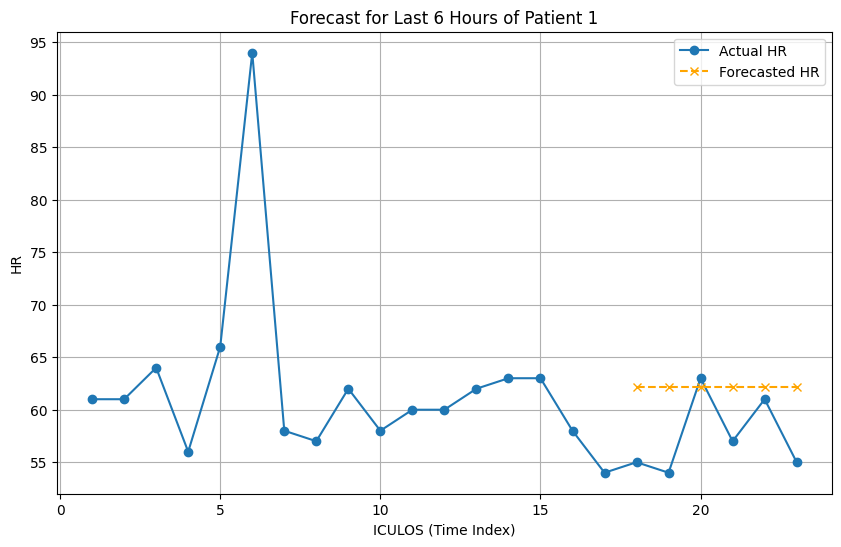

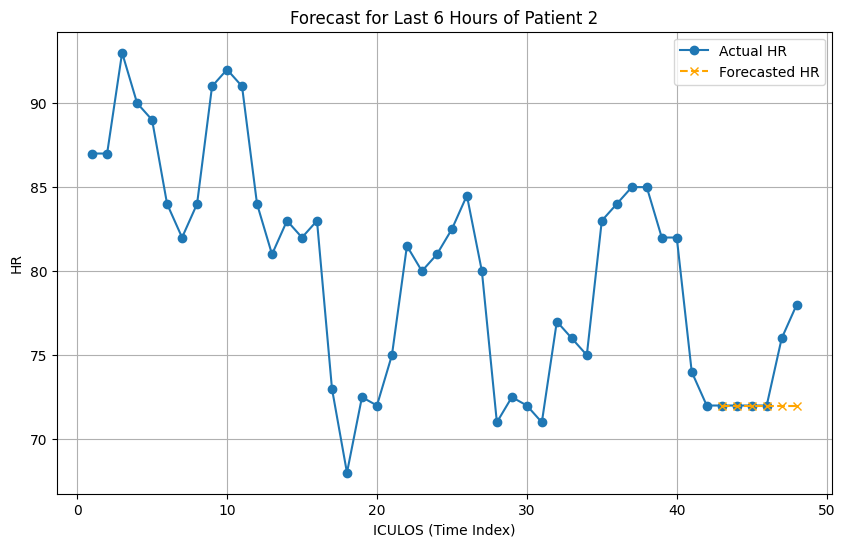

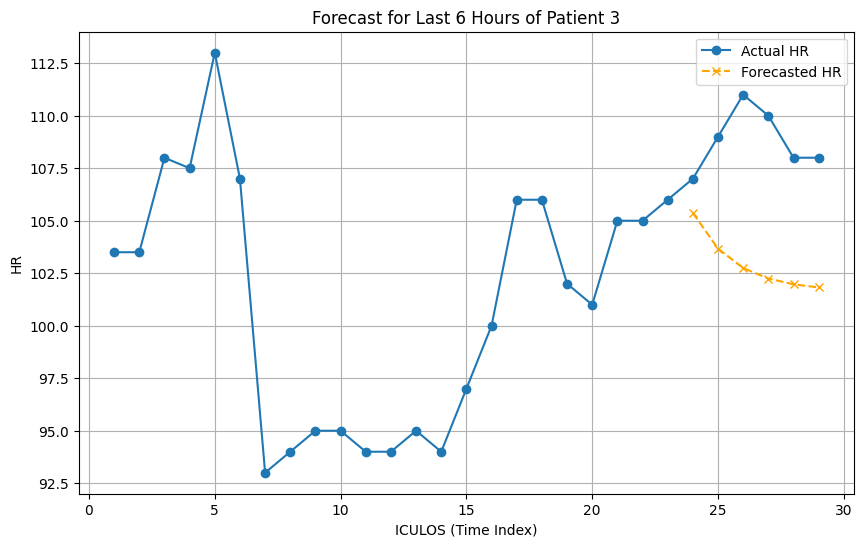

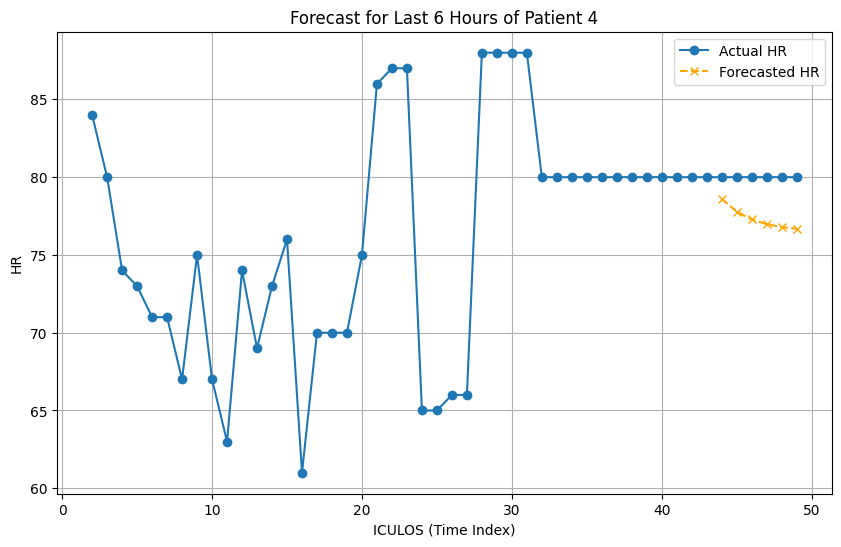

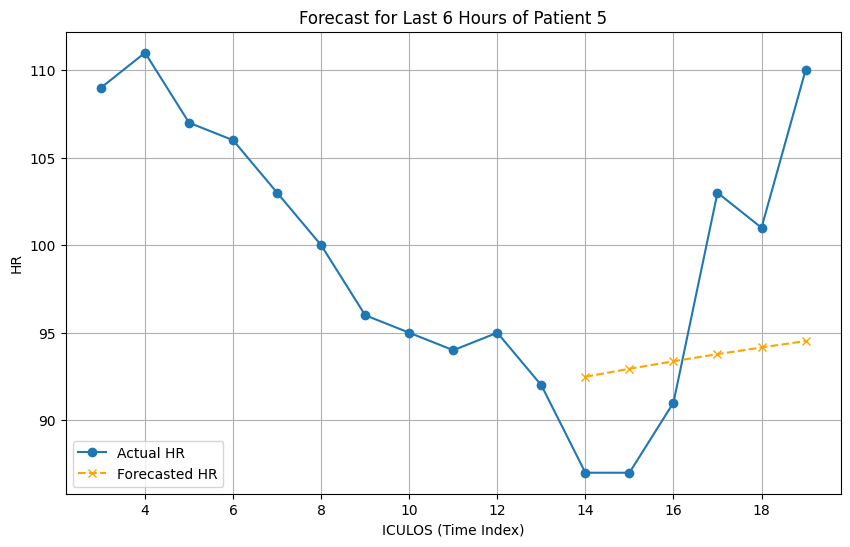

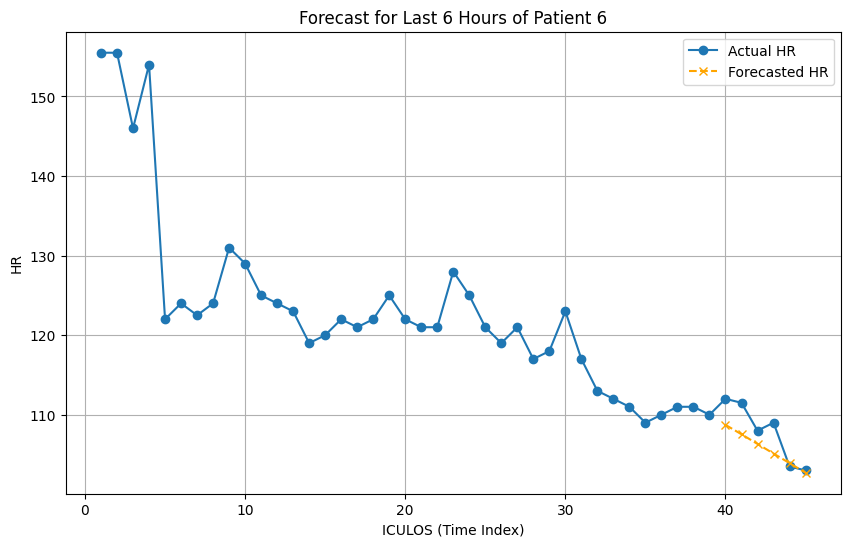

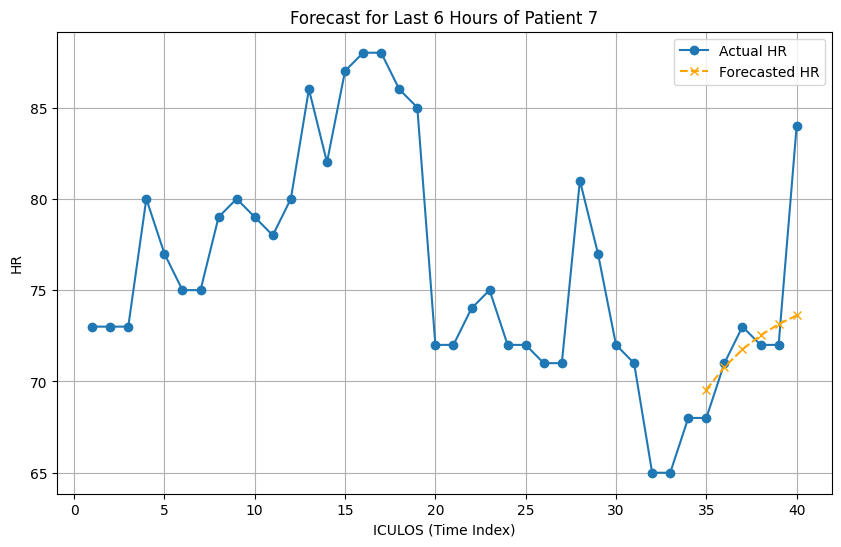

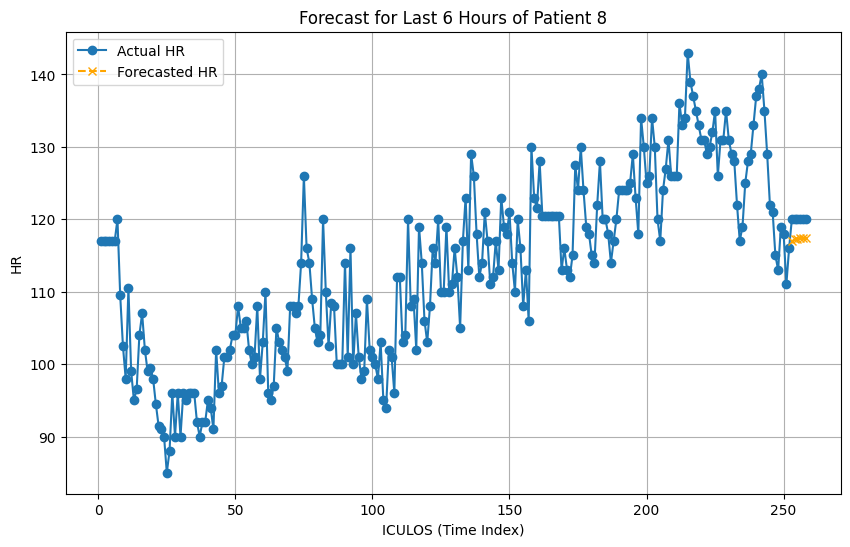

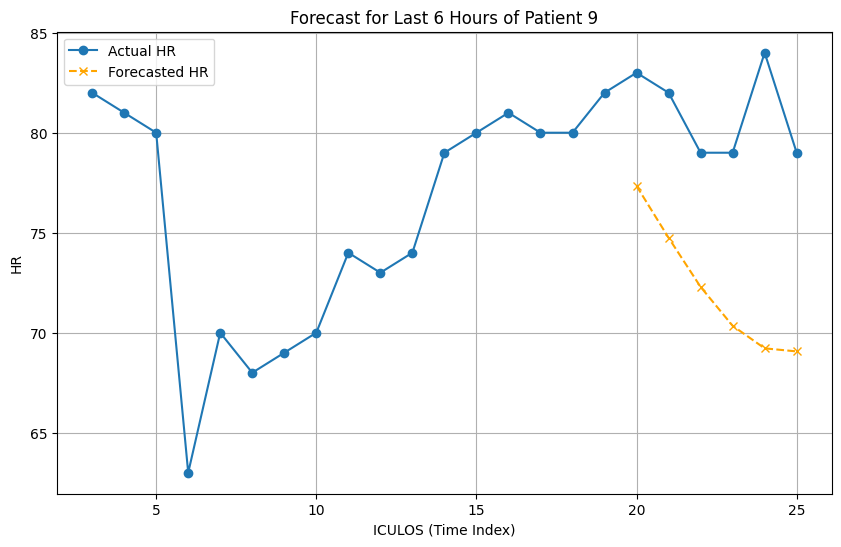

In [4]:
HRforecaster = ARIMAmodel.ARIMAForecaster('HR', train_data_sub, test_data_sub)
HRforecaster.fit()
forecasts = HRforecaster.predict(steps=6)
for patient_id in range(1, 10):
    HRforecaster.plot_forecast(forecasts, patient_id=patient_id, steps=6)

In [4]:
HRforecaster.evaluate_model(forecasts)

ValueError: cannot join with no overlapping index names

In [6]:
VARforecaster = VARmodel.VARForecaster(train_data_sub, test_data_sub, ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp'])

In [7]:
VARforecaster.fit()
VARforecasts = VARforecaster.predict(steps=6)

ValueError: VAR cannot handle missing data (nans), but y passed contained missing data.

In [ ]:
VARforecaster.evaluate_model(VARforecasts)

In [ ]:
VARforecaster.plot_forecast(VARforecasts)